#Visualization of Quantum States and Processes

###Contents
- [Introduction](#intro)
- [Fock-Basis Probability Distributions](#fock)
- [Quasi-Probability Distributions](#quasi)
- [Visualizing Operators](#visual)
- [Quantum Process Tomography](#qpt)

In [1]:
%matplotlib inline
import numpy as np
from pylab import *
from qutip import *

<a id='intro'></a>

##Introduction

Visualization is often an important complement to a simulation of a quantum
mechanical system. The first method of visualization that come to mind might be
to plot the expectation values of a few selected operators. But on top of that,
it can often be instructive to visualize for example the state vectors or
density matices that describe the state of the system, or how the state is
transformed as a function of time (see process tomography below). In this 
section we demonstrate how QuTiP and matplotlib can be used to perform a few
types of  visualizations that often can provide additional understanding of
quantum system.


<a id='fock'></a>

##Fock-Basis Probability Distributions

In quantum mechanics probability distributions plays an important role, and as
in statistics, the expectation values computed from a probability distribution
does not reveal the full story. For example, consider an quantum harmonic
oscillator mode with Hamiltonian $H = \hbar\omega a^\dagger a$, which is 
in a state described by its density matrix $\rho$, and which on average
is occupied by two photons, $\mathrm{Tr}[\rho a^\dagger a] = 2$. Given
this information we cannot say whether the oscillator is in a Fock state, 
a thermal state, a coherent state, etc. By visualizing the photon distribution
in the Fock state basis important clues about the underlying state can be
obtained.

One convenient way to visualize a probability distribution is to use histograms.
Consider the following histogram visualization of the number-basis probability
distribution, which can be obtained from the diagonal of the density matrix, 
for a few possible oscillator states with on average occupation of two photons.

First we generate the density matrices for the coherent, thermal and fock states, respectively.

In [5]:
N = 20
rho_coherent = coherent_dm(N, np.sqrt(2))
rho_thermal = thermal_dm(N, 2)
rho_fock = fock_dm(N, 2)

Next, we plot histograms of the diagonals of the density matrices:

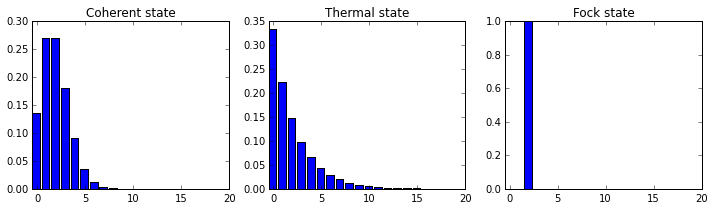

In [6]:
fig, axes = subplots(1, 3, figsize=(12,3))

bar0 = axes[0].bar(np.arange(0, N)-.5, rho_coherent.diag())
lbl0 = axes[0].set_title("Coherent state")
lim0 = axes[0].set_xlim([-.5, N])

bar1 = axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())
lbl1 = axes[1].set_title("Thermal state")
lim1 = axes[1].set_xlim([-.5, N])

bar2 = axes[2].bar(np.arange(0, N)-.5, rho_fock.diag())
lbl2 = axes[2].set_title("Fock state")
lim2 = axes[2].set_xlim([-.5, N])

All these states correspond to an average of two photons, but by visualizing
the photon distribution in Fock basis the differences between these states is
easily appreciated. 

One frequently need to visualize the Fock-distribution in the way described
above, so QuTiP provides a convenience function for doing this, see
`plot_fock_distribution`, and the following example:

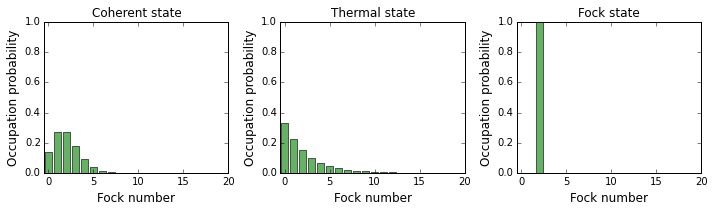

In [13]:
fig, axes = subplots(1, 3, figsize=(10,3))
plot_fock_distribution(rho_coherent, fig=fig, ax=axes[0], title="Coherent state")
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title="Thermal state")
plot_fock_distribution(rho_fock, fig=fig, ax=axes[2], title="Fock state")
fig.tight_layout()
show()

<a id='quasi'></a>

##Quasi-Probability Distributions

The probability distribution in the number (Fock) basis only describes the
occupation probabilities for a discrete set of states. A more complete
phase-space probability-distribution-like function for harmonic modes are 
the Wigner and Husumi Q-functions, which are full descriptions of the 
quantum state (equivalent to the density matrix). These are called
quasi-distribution functions because unlike real probability distribution
functions they can for example be negative. In addition to being more complete descriptions of a state (compared to only the occupation probabilities plotted above),
these distributions are also great for demonstrating if a quantum state is
quantum mechanical, since for example a negative Wigner function
is a definite indicator that a state is distinctly nonclassical.


###Wigner Function

In QuTiP, the Wigner function for a harmonic mode can be calculated with the
function `wigner`. It takes a ket or a density matrix as input, together with arrays that define the ranges of the phase-space coordinates (in the x-y plane). In the following example the Wigner functions are calculated and plotted for the same three states as in the previous section.

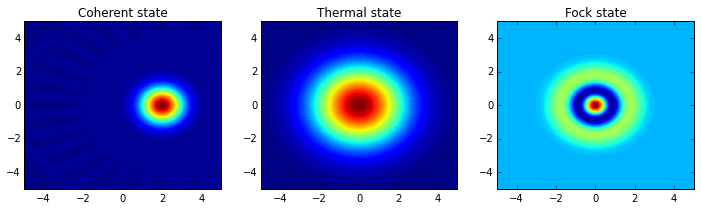

In [18]:
xvec = np.linspace(-5,5,200)
W_coherent = wigner(rho_coherent, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_fock = wigner(rho_fock, xvec, xvec)

fig, axes = subplots(1, 3, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)
lbl2 = axes[2].set_title("Fock state")

###Custom Color Maps

The main objective when plotting a Wigner function is to demonstrate that the underlying
state is nonclassical, as indicated by negative values in the Wigner function.  Therefore,
making these negative values stand out in a figure is helpful for both analysis and publication
purposes.  Unfortunately, all of the color schemes used in Matplotlib (or any other plotting software)
are linear colormaps where small negative values tend to be near the same color as the zero values, and
are thus hidden.  To fix this dilemma, QuTiP includes a nonlinear colormap function `wigner_cmap`
that colors all negative values differently than positive or zero values.  Below is a demonstration of how to use
this function in your Wigner figures:

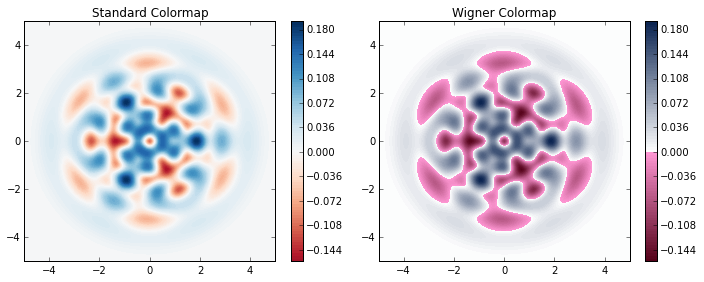

In [19]:
import matplotlib as mpl
from matplotlib import cm

psi = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()
xvec = np.linspace(-5, 5, 500)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, axes = subplots(1, 2, figsize=(10, 4))
plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
axes[0].set_title("Standard Colormap")
cb1 = fig.colorbar(plt1, ax=axes[0])

plt2 = axes[1].contourf(xvec, xvec, W, 100, cmap=wmap)  # Apply Wigner colormap
axes[1].set_title("Wigner Colormap")
cb2 = fig.colorbar(plt2, ax=axes[1])
fig.tight_layout()
show()

###Husimi Q-function

The Husimi Q function is, like the Wigner function, a quasiprobability
distribution for harmonic modes. It is defined as

$$
Q(\alpha) = \frac{1}{\pi}\left<\alpha|\rho|\alpha\right>
$$

where $\left|\alpha\right>$ is a coherent state and $\alpha = x + iy$. In QuTiP, the Husimi Q function can be computed given a state ket or density matrix using the function `qfunc`, as demonstrated below.

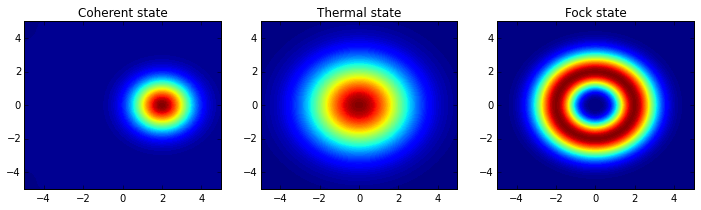

In [21]:
Q_coherent = qfunc(rho_coherent, xvec, xvec)
Q_thermal = qfunc(rho_thermal, xvec, xvec)
Q_fock = qfunc(rho_fock, xvec, xvec)

fig, axes = subplots(1, 3, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, Q_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, Q_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, Q_fock, 100)
lbl2 = axes[2].set_title("Fock state")
show()

<a id='visual'></a>

##Visualizing Operators

Sometimes, it may also be useful to directly visualizing the underlying matrix
representation of an operator. The density matrix, for example, is an operator
whose elements can give insights about the state it represents, but one might
also be interesting in plotting the matrix of an Hamiltonian to inspect the 
structure and relative importance of various elements.

QuTiP offers a few functions for quickly visualizing matrix data in the
form of histograms, `matrix_histogram` and `matrix_histogram_complex`, and as Hinton diagram of weighted squares, `hinton`. These functions takes a `Qobj` as first argument, and optional arguments to, for example, set the axis labels and figure title (see the function's documentation for details). 

For example, to illustrate the use of `matrix_histogram`, let's visualize of the Jaynes-Cummings Hamiltonian:

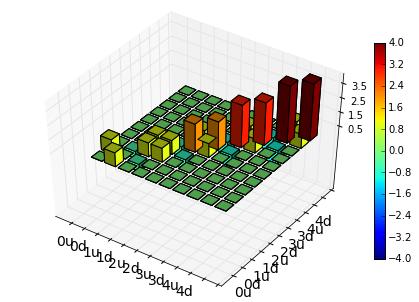

In [33]:
N = 5
a = tensor(destroy(N), qeye(2))
b = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())
H = a.dag() * a + sx - 0.5 * (a * b.dag() + a.dag() * b)

# visualize H 
lbls_list = [[str(d) for d in range(N)], ["u", "d"]]
xlabels = []
for inds in tomography._index_permutations([len(lbls) for lbls in lbls_list]):
    xlabels.append("".join([lbls_list[k][inds[k]] for k in range(len(lbls_list))]))

fig, ax = matrix_histogram(H, xlabels, xlabels, limits=[-4,4])
ax.view_init(azim=-55, elev=45)
show()

Similarly, we can use the function `hinton`, which is used below to visualize the corresponding steadystate density matrix: 

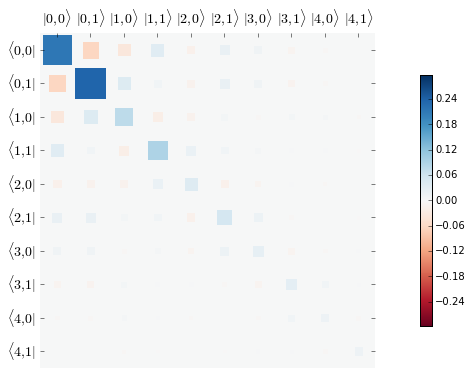

In [34]:
rho_ss = steadystate(H, [np.sqrt(0.1) * a, np.sqrt(0.4) * b.dag()])
fig, ax = hinton(rho_ss) # xlabels=xlabels, ylabels=xlabels)
show()

<a id='qpt'></a>

##Quantum Process Tomography

Quantum process tomography (QPT) is a useful technique for characterizing experimental implementations of quantum gates involving a small number of qubits. It can also be a useful theoretical tool that can give insight in how a process transforms states, and it can be used for example to study how noise or other imperfections deteriorate a gate. Whereas a fidelity or distance measure can give a single number that indicates how far from ideal a gate is, a quantum process tomography analysis can give detailed information about exactly what kind of errors various imperfections introduce.

The idea is to construct a transformation matrix for a quantum process (for example a quantum gate) that describes how the density matrix of a system is transformed by the process. We can then decompose the transformation in some operator basis that represent well-defined and easily interpreted transformations of the input states. 

To see how this works, consider a process that is described by quantum map $\epsilon(\rho_{\rm in}) = \rho_{\rm out}$, which can be written

$$
\epsilon(\rho_{\rm in}) = \rho_{\rm out} = \sum_{i}^{N^2} A_i \rho_{\rm in} A_i^\dagger,
$$

where $N$ is the number of states of the system (that is, $\rho$ is represented by an $[N\times N]$ matrix). Given an orthogonal operator basis of our choice ${B_i\}_i^{N^2}$, which satisfies ${\rm Tr}[B_i^\dagger B_j] = N\delta_{ij}$, we can write the map as

$$
\epsilon(\rho_{\rm in}) = \rho_{\rm out} = \sum_{mn} \chi_{mn} B_m \rho_{\rm in} B_n^\dagger.
$$

where $\chi_{mn} = \sum_{ij} b_{im}b_{jn}^*$ and $A_i = \sum_{m} b_{im}B_{m}$. Here, matrix $\chi$ is the transformation matrix we are after, since it describes how much $B_m \rho_{\rm in} B_n^\dagger$ contributes to $\rho_{\rm out}$.

In a numerical simulation of a quantum process we usually do not have access to the quantum map in the above form. Instead, what we usually can do is to calculate the propagator $U$ for the density matrix in superoperator form, using for example the QuTiP function `propagator`. We can then write 

$$
\epsilon(\tilde{\rho}_{\rm in}) = U \tilde{\rho}_{\rm in} = \tilde{\rho}_{\rm out}
$$

where $\tilde{\rho}$ is the vector representation of the density matrix $\rho$. If we write in superoperator form we obtain

$$
\tilde{\rho}_{\rm out} = \sum_{mn} \chi_{mn} \tilde{B}_m \tilde{B}_n^\dagger \tilde{\rho}_{\rm in} = U \tilde{\rho}_{\rm in}.
$$

so we can identify

$$
U = \sum_{mn} \chi_{mn} \tilde{B}_m \tilde{B}_n^\dagger.
$$

Now this is a linear equation systems for the $N^2 \times N^2$ elements in $\chi$. We can solve it by writing $\chi$ and the superoperator propagator as $[N^4]$ vectors, and likewise write the superoperator product $\tilde{B}_m\tilde{B}_n^\dagger$ as a $[N^4\times N^4]$ matrix $M$:

$$
U_I = \sum_{J}^{N^4} M_{IJ} \chi_{J}
$$

with the solution

$$
\chi = M^{-1}U.
$$

Note that to obtain $\chi$ with this method we have to construct a matrix $M$ with a size that is the square of the size of the superoperator for the system. Obviously, this scales very badly with increasing system size, but this method can still be a very useful for small systems (such as system comprised of a small number of coupled qubits).

##Implementation in QuTiP

In QuTiP, the procedure described above is implemented in the function `qpt`, which returns the $\chi$ matrix given a density matrix propagator. To illustrate how to use this function, let's consider the $i$-SWAP gate for two qubits. In QuTiP the function `iswap` generates the unitary transformation for the state kets:

In [2]:
U_psi = iswap()

To be able to use this unitary transformation matrix as input to the function `qpt`, we first need to convert it to a transformation matrix for the corresponding density matrix:

In [3]:
U_rho = spre(U_psi) * spost(U_psi.dag())

Next, we construct a list of operators that define the basis $\{B_i\}$ in the form of a list of operators for each composite system. At the same time, we also construct a list of corresponding labels that will be used when plotting the $\chi$ matrix.

In [4]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

We are now ready to compute $\chi$ using `qpt`, and to plot it using `qpt_plot_combined`.

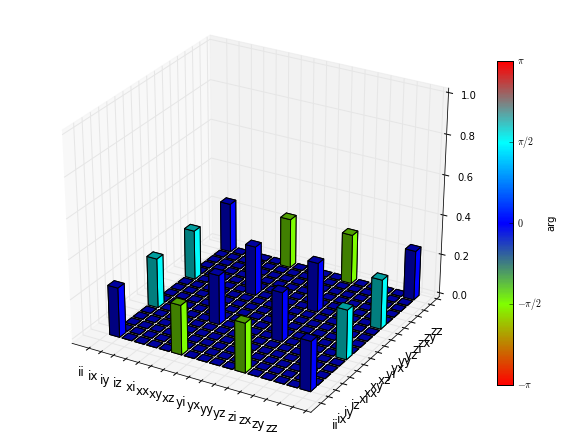

In [5]:
chi = qpt(U_rho, op_basis)
fig = qpt_plot_combined(chi, op_label, r'$i$SWAP')
show()

For a slightly more advanced example, where the density matrix propagator is calculated from the dynamics of a system defined by its Hamiltonian and collapse operators using the function `propagator`, see the notebook [Time-dependent master equation: Landau-Zener transitions](http://nbviewer.ipython.org/github/qutip/qutip-notebooks/blob/master/examples/example-landau-zener.ipynb) on the tutorials section on the QuTiP web site.

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/guide.css", "r").read()
    return HTML(styles)
css_styling()